-0.0010000000000000009 0.2588693958 -0.23320000000000002
-0.201 -0.0600389850000001 0.506


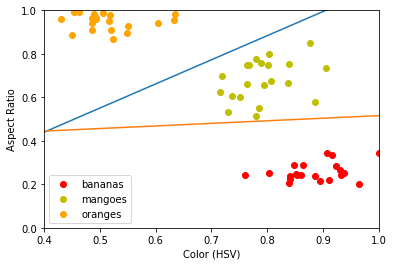

In [9]:
import numpy as np
import matplotlib.pyplot as plt
b_color=[0.840155945,0.838206628,0.803118908,0.964912281,0.863547758,0.840155945,0.929824561,0.847953216,0.859649123,0.85380117,0.937621832,0.916179337,0.931773879,0.906432749,0.910331384,0.760233918,0.851851852,0.923976608,0.884990253,0.894736842,1]
b_ratio=[0.24,0.205,0.253,0.2,0.287,0.223,0.267,0.287,0.241,0.245,0.251,0.337,0.242,0.342,0.222,0.242,0.249,0.285,0.239,0.216,0.342]
m_color=[0.779727096,0.801169591,0.779727096,0.877192982,0.750487329,0.904483431,0.71539961,0.79337232,0.764132554,0.736842105,0.764132554,0.789473684,0.719298246,0.838206628,0.803118908,0.768031189,0.785575049,0.807017544,0.729044834,0.83625731,0.884990253]
m_ratio=[0.776,0.751,0.512,0.851,0.6,0.735,0.623,0.655,0.749,0.608,0.662,0.756,0.696,0.754,0.798,0.751,0.549,0.675,0.534,0.667,0.577]
o_color=[0.485380117,0.493177388,0.504873294,0.635477583,0.489278752,0.633528265,0.516569201,0.518518519,0.450292398,0.524366472,0.461988304,0.43079922,0.49122807,0.549707602,0.547758285,0.485380117,0.493177388,0.520467836,0.485380117,0.454191033,0.604288499]
o_ratio=[0.942,0.962,0.986,0.984,0.984,0.956,0.953,0.977,0.885,0.87,0.991,0.962,0.968,0.927,0.897,0.966,0.966,0.911,0.911,0.993,0.94]
#Combining features
x = m_color + o_color
y = m_ratio + o_ratio

g = m_color + b_color
h = m_ratio + b_ratio

weights1 = [-0.001, 0.2, -0.2]
weights2 = [-0.001, 0.2, -0.2]
rate= 0.1

#Training weights mangoes vs oranges
def function(a):
    if a >= 0:
        return 1
    else:
        return -1
    
for i in range(100):
    for j in range(42):
        if j < 21:
            d = 1
        else:
            d = -1
        a = weights1[0] + x[j]*weights1[1] + y[j]*weights1[2]
        z = function(a)
        
        weights1[0] += rate*(d-z)
        weights1[1] += rate*(d-z)*x[j]
        weights1[2] += rate*(d-z)*y[j]
        
#Training weights mangoes vs bananas

for i in range(100):
    for j in range(42):
        if j < 21:
            d = 1
        else:
            d = -1
        a = weights2[0] + g[j]*weights2[1] + h[j]*weights2[2]
        z = function(a)
        
        weights2[0] += rate*(d-z)
        weights2[1] += rate*(d-z)*g[j]
        weights2[2] += rate*(d-z)*h[j]
        


fig, ax = plt.subplots()

ax.set_ylim([0, 1])
ax.set_xlim([0.4, 1])

ax.scatter(b_color, b_ratio, c="r",label='bananas')
ax.scatter(m_color, m_ratio, c="y",label='mangoes')
ax.scatter(o_color, o_ratio, c="orange",label='oranges')

w0 = weights1[0]
w1 = weights1[1]
w2 = weights1[2]
m1 = -w1 / w2
b1 = -w0 / w2
v0 = weights2[0]
v1 = weights2[1]
v2 = weights2[2]
m2 = -v1 / v2
b2 = -v0 / v2

X= np.arange(0,8)
Y= np.arange(0,8)
print(w0,w1,w2)
print(v0,v1,v2)
ax.plot(X, m1 * X + b1)
ax.plot(Y, m2 * Y + b2)


ax.legend()
plt.ylabel('Aspect Ratio')
plt.xlabel('Color (HSV)')
plt.show()
